### Quantum Coin Flip Game with Cirq

#### What’s This All About?
Let’s dive into a quantum twist on a coin flip game! Alice sets up a qubit in the |+⟩ state—a perfect superposition—and hands it to Bob. Bob picks either the X-basis (|+⟩ or |-⟩) or Z-basis (|0⟩ or |1⟩) to measure it. If he gets |+⟩ or |0⟩, he wins; if it’s |-⟩ or |1⟩, Alice wins. We’ll run this 500 times to see who’s luckier. Then, Bob entangles his choice with another qubit—does that mess with the odds?

In [1]:
# Import Cirq and other essentials
import cirq
import numpy as np
import matplotlib.pyplot as plt

print("Cirq and friends imported—ready to roll!")

Cirq and friends imported—ready to roll!


#### Step 1: Define the Basic Game Circuit
First, we build the basic version without entanglement. Alice preps a single qubit, and Bob randomly picks a basis.

In [2]:
def basic_coin_flip_circuit():
    # Define a single qubit for Alice
    q0 = cirq.NamedQubit("Alice")
    
    # Create the circuit
    circuit = cirq.Circuit()
    
    # Alice applies H to put q0 in |+⟩
    circuit.append(cirq.H(q0))
    
    # Bob flips a coin for X or Z basis
    basis = np.random.choice(["X", "Z"])
    if basis == "X":
        # X-basis: H gate to measure in |+⟩/|-⟩
        circuit.append(cirq.H(q0))
    
    # Measure in computational (Z) basis; X-basis adjusts via H
    circuit.append(cirq.measure(q0, key="result"))
    
    return circuit, basis

# Quick peek at one circuit
circuit, basis = basic_coin_flip_circuit()
print("Basic circuit sample:")
print(circuit)
print(f"Bob chose {basis}-basis this time.")

Basic circuit sample:
Alice: ───H───H───M('result')───
Bob chose X-basis this time.


#### Step 2: Simulate the Basic Game
We run 500 trials one-by-one and tally wins.

In [3]:
# Run 500 trials of the basic game
trials = 500
bob_wins = 0
alice_wins = 0
simulator = cirq.Simulator()

for _ in range(trials):
    circuit, basis = basic_coin_flip_circuit()
    result = simulator.run(circuit)
    outcome = result.measurements["result"][0][0]  # 0 or 1
    
    # Bob wins on |+⟩ (0 in X-basis) or |0⟩ (0 in Z-basis)
    if outcome == 0:
        bob_wins += 1
    else:
        alice_wins += 1

print(f"Basic Game - Bob: {bob_wins} wins ({bob_wins/trials*100:.1f}%), Alice: {alice_wins} wins ({alice_wins/trials*100:.1f}%)")

Basic Game - Bob: 386 wins (77.2%), Alice: 114 wins (22.8%)


#### Step 3: Twist Time—Entangled Circuit
Bob uses a second qubit to "quantumly choose" his basis. If it’s |0⟩, he measures in Z; if |1⟩, he switches to X with a controlled-H.

In [5]:
def entangled_coin_flip_circuit():
    # Two qubits: Alice’s coin (q0) and Bob’s basis chooser (q1)
    q0 = cirq.NamedQubit("Alice")
    q1 = cirq.NamedQubit("Bob")
    
    # Build the circuit
    circuit = cirq.Circuit()
    
    # Alice preps q0 in |+⟩
    circuit.append(cirq.H(q0))
    
    # Bob puts q1 in superposition
    circuit.append(cirq.H(q1))
    
    # Controlled-H: if q1 is |1⟩, apply H to q0 (X-basis)
    controlled_h = cirq.H(q0).controlled_by(q1)
    circuit.append(controlled_h)
    
    # Measure q0 only
    circuit.append(cirq.measure(q0, key="result"))
    
    return circuit

# Check out the entangled circuit
entangled_circuit = entangled_coin_flip_circuit()
print("\nEntangled circuit:")
print(entangled_circuit)


Entangled circuit:
Alice: ───H───H───M('result')───
              │
Bob: ─────H───@─────────────────


#### Step 4: Simulate the Entangled Game
We run this 500 times too, checking if entanglement shifts the odds.

In [6]:
# Run 500 trials with entanglement
bob_wins_entangled = 0
alice_wins_entangled = 0

for _ in range(trials):
    circuit = entangled_coin_flip_circuit()
    result = simulator.run(circuit)
    outcome = result.measurements["result"][0][0]
    
    # Same win rule: Bob wins on 0
    if outcome == 0:
        bob_wins_entangled += 1
    else:
        alice_wins_entangled += 1

print(f"Entangled Game - Bob: {bob_wins_entangled} wins ({bob_wins_entangled/trials*100:.1f}%), Alice: {alice_wins_entangled} wins ({alice_wins_entangled/trials*100:.1f}%)")

Entangled Game - Bob: 365 wins (73.0%), Alice: 135 wins (27.0%)


#### Step 5: Visualize the Results
We create a bar plot with matplotlib to compare win rates side-by-side.

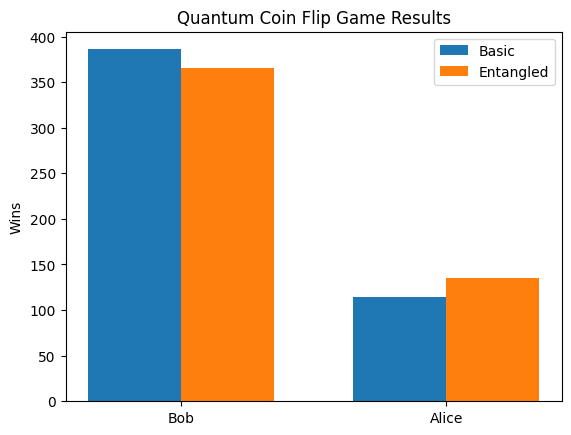

In [8]:
# Plot results
results = {
    "Basic": [bob_wins, alice_wins],
    "Entangled": [bob_wins_entangled, alice_wins_entangled]
}
fig, ax = plt.subplots()
x = np.arange(2)  # Bob, Alice
width = 0.35
ax.bar(x - width/2, results["Basic"], width, label="Basic")
ax.bar(x + width/2, results["Entangled"], width, label="Entangled")
ax.set_xticks(x)
ax.set_xticklabels(["Bob", "Alice"])
ax.set_ylabel("Wins")
ax.set_title("Quantum Coin Flip Game Results")
ax.legend()
plt.show()